In [ ]:
#Importing Opencv Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Defining Location
 i.e labelled Data
loc=r'/content/drive/MyDrive/Soil/SoilImages'



Dealing with Images Using Opencv and matplotlib

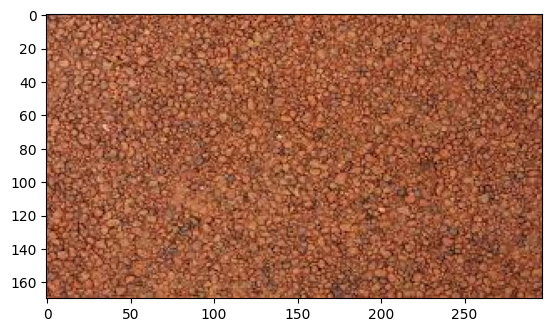

In [ ]:

import cv2
import matplotlib.pyplot as plt

# Location of the unknown image
image_path = '/content/drive/MyDrive/Soil/SoilImages/Red_3.jpg'

# Read the image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the RGB image
plt.imshow(rgb_image)
plt.show()


Concept Of Slicing

In [ ]:

name='Alluvial_0.jpg'    #slicing the list
name.split('_')        #Splitting



['Alluvial', '0.jpg']

OS library and its functions

In [ ]:
#Importing OS Library for dealing with the Directory(ALL Files at the same time )
import os

os.listdir(loc)  #Listdir displays all files in current directory




['Sandy_3.jpg',
 'Sandy_71.jpg',
 'Sandy_69.jpg',
 'Sandy_61.jpg',
 'Sandy_98.jpg',
 'Sandy_1.jpg',
 'Sandy_13.jpg',
 'Sandy_21.jpg',
 'Sandy_32.jpg',
 'Sandy_5.jpg',
 'Sandy_2.jpg',
 'Sandy_85.jpg',
 'Sandy_52.jpg',
 'Sandy_38.jpg',
 'Sandy_89.jpg',
 'Sandy_43.jpg',
 'Sandy_46.jpg',
 'Sandy_19.jpg',
 'Sandy_0.jpg',
 'Sandy_60.jpg',
 'Sandy_34.jpg',
 'Sandy_31.jpg',
 'Sandy_101.jpg',
 'Sandy_47.jpg',
 'Sandy_15.jpg',
 'Sandy_7.jpg',
 'Sandy_40.jpg',
 'Sandy_74.jpg',
 'Sandy_72.jpg',
 'Sandy_94.jpg',
 'Sandy_18.jpg',
 'Sandy_29.jpg',
 'Sandy_79.jpg',
 'Sandy_87.jpg',
 'Sandy_41.jpg',
 'Sandy_4.jpg',
 'Sandy_95.jpg',
 'Sandy_36.jpg',
 'Sandy_25.jpg',
 'Sandy_50.jpg',
 'Sandy_23.jpg',
 'Sandy_59.jpg',
 'Sandy_30.jpg',
 'Sandy_96.jpg',
 'Sandy_24.jpg',
 'Sandy_39.jpg',
 'Sandy_77.jpg',
 'Sandy_11.jpg',
 'Sandy_70.jpg',
 'Sandy_82.jpg',
 'Sandy_67.jpg',
 'Sandy_100.jpg',
 'Sandy_76.jpg',
 'Sandy_81.jpg',
 'Sandy_49.jpg',
 'Sandy_16.jpg',
 'Sandy_20.jpg',
 'Sandy_48.jpg',
 'Sandy_8.jpg',
 'S

In [ ]:
os.path           #Tells about current Path

<module 'posixpath' from '/usr/lib/python3.10/posixpath.py'>

In [ ]:
os.path.join(loc,'Alluvial_24.jpg')  #joining the path using join command

'/content/drive/MyDrive/Soil/SoilImages/Alluvial_24.jpg'

Extracing Labels from set of images using slicing concept

In [ ]:
import os
label=[]   # List for labels
for i in os.listdir(loc):    # looping the directory
    if i.split('_')[0]=='Alluvial':
        label.append(0)
    elif i.split('_')[0]=='Black':  # we are separating labels
        label.append(1)
    if i.split('_')[0]=='Clay':
        label.append(2)
    if i.split('_')[0]=='Red':
        label.append(3)
    if i.split('_')[0]=='Sandy':
        label.append(4)

#0 - Alluvial
#1 - Black
#2 - Clay
#3 - Red
#4 - Sandy

Extracting the features now

In [ ]:
features = []  # List for features
for i in os.listdir(loc):
    if i.startswith('.ipynb_checkpoints'):
        continue  # Skip files starting with '.ipynb_checkpoints'
    try:
        f = cv2.imread(os.path.join(loc, i))
        if f is not None:
            resized_f = cv2.resize(f, (255, 255))
            features.append(resized_f)
        else:
            print(f"Failed to read image: {i}")
    except Exception as e:
        print(f"Error processing image: {i}. {str(e)}")

In [ ]:
#we got features but its a 4 dimensional array
import numpy as np
np.array(features).shape    #np.array used to convert features into array



(694, 255, 255, 3)

Getting Dataset into Variables

In [ ]:
#Convering Features and Labels into array so that they can be passed to models
X=np.array(features)
Y=np.array(label)
X=X.reshape(694,195075)
print("Reshaped X:", X.shape) #converting features of 4 dimensions into d dimensions using reshape function

Reshaped X: (694, 195075)


In [ ]:
# Ignore the excess samples by truncating or slicing
if len(X) > len(Y):
    X = X[:len(Y)]
elif len(Y) > len(X):
    Y = Y[:len(X)]

# Both variables now have the same length
print(len(X))  # Output: 4
print(len(Y))  # Output: 4

694
694


Splitting the Data set into test and train

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
#Training Accuracy
#Accuracy Of Random Forst over Training Data
rf_train_accuracy=rmodel.score(xtrain,ytrain)
rf_train_accuracy

0.9961538461538462

In [ ]:
#Testing Accuracy
#accuracy of random forest over test data
rf_test_accuracy=rmodel.score(xtest,ytest)
rf_test_accuracy


0.6781609195402298


# Random Forest Model Prediction

In [ ]:
rmodel.predict(xtest[100].reshape(1,-1)) #predicitng

array([2])

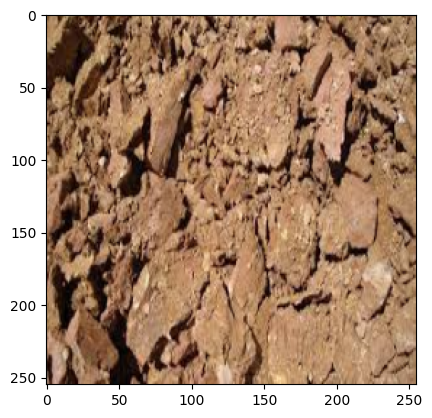

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(xtest[100].reshape(255, 255, 3), cv2.COLOR_BGR2RGB)

# Plotting the grayscale image
plt.imshow(gray_image)
plt.show()

Using Naive baiyes

In [ ]:
# using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gmodel=GaussianNB()

In [ ]:
#Trainig over data
gmodel.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
#Training Accuracy of Naive bayes
#Accuracy of Naive Bayes over training Data
nb_train_accuracy = gmodel.score(xtrain,ytrain)
nb_train_accuracy

0.65

In [ ]:
#Testing Accuracy
nb_test_accuracy=gmodel.score(xtest,ytest)
nb_test_accuracy

0.632183908045977


# Naive Bayes model prediction

In [ ]:
gmodel.predict(xtest[30].reshape(1,-1)) #predicitng

array([2])

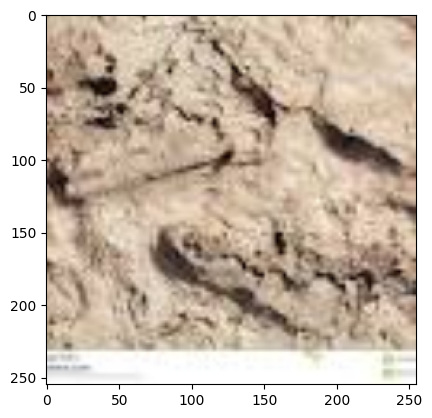

In [ ]:
#plotting the predicted Value TO check
import matplotlib.pyplot as plt
# Convert the image to grayscale
gray_image = cv2.cvtColor(xtest[30].reshape(255, 255, 3), cv2.COLOR_BGR2RGB)

# Plotting the grayscale image
plt.imshow(gray_image)
plt.show()

In [ ]:
xtest_2d = xtest[18].reshape(-1, 1)

Accuracy comparison

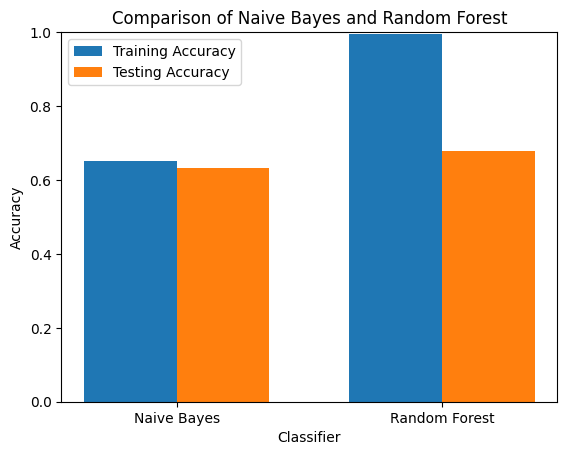

In [ ]:
# Create bar plots for training and testing accuracies
labels = ['Naive Bayes', 'Random Forest']
train_accuracies = [nb_train_accuracy, rf_train_accuracy]
test_accuracies = [nb_test_accuracy, rf_test_accuracy]

# Set the positions of the bars
x = np.arange(len(labels))
width = 0.35

# Plot the training accuracies
plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')

# Plot the testing accuracies
plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

# Add labels, title, and legend
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes and Random Forest')
plt.xticks(x, labels)
plt.ylim(0, 1)  # Set the y-axis limits
plt.legend()

plt.show()
